### Survival Analysis in Camden - version with dimensions

In [143]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [144]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

In [145]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter

In [146]:
df = pd.read_csv("Camden High Streets/camden-final-survival-full-with-dimensions.csv", low_memory=False)

In [147]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,PM10Tot10,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected
0,0,31883,31883,2.33002E+11,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,0.379675,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653
1,1,31899,31899,2.33002E+11,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,0.379675,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,0.379675,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653
3,3,32339,32339,2.33005E+11,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,0.379675,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653
4,4,84736,84736,5.32E+11,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,0.379675,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,0.512255,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740
4213,4213,414838,414838,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,0.512255,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740
4214,4214,414898,414898,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,0.512255,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740
4215,4215,414853,414853,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,0.512255,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740


In [148]:
df['cluster'] = 0

In [149]:
df.loc[df['highstreet'] == "CamdenT", 'cluster'] = 1

In [150]:
df.loc[df['highstreet'] == "Hampsted", 'cluster'] = 2

In [151]:
df.loc[df['highstreet'] == "WestEnd", 'cluster'] = 2

In [152]:
df.loc[df['highstreet'] == "Fortress", 'cluster'] = 3

In [153]:
df.loc[df['highstreet'] == "Kilburn", 'cluster'] = 3

In [154]:
df.loc[df['highstreet'] == "Eversholt", 'cluster'] = 4

In [155]:
df.loc[df['highstreet'] == "Haverstock", 'cluster'] = 4

In [156]:
df.loc[df['highstreet'] == "Regents", 'cluster'] = 4

In [157]:
df.loc[df['highstreet'] == "South End", 'cluster'] = 4

In [158]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,total_buildings,total_floor_area,mean_floor_area,total_rental_valuation,mean_rental_valuation,total_rates_paid,mean_rates_paid,total_rates_expected,mean_rates_expected,cluster
0,0,31883,31883,2.33002E+11,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,0
1,1,31899,31899,2.33002E+11,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,0
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,0
3,3,32339,32339,2.33005E+11,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,0
4,4,84736,84736,5.32E+11,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,1043,78485.2765,75.249546,14851550,14239.26174,1351522.88,3078.639818,7438658.95,7131.983653,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740,4
4213,4213,414838,414838,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740,4
4214,4214,414898,414898,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740,4
4215,4215,414853,414853,7.82002E+11,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,1198,154736.5106,129.162363,51672550,43132.34558,6105201.83,6399.582631,26275813.95,21933.066740,4


In [159]:
df.loc[df['category'].isnull(), 'category'] = "Other"

In [66]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [67]:
def plot_lifelines(obs):
    """Plot a line for each observation.
    
    obs: DataFrame
    """
    for y, row in obs.iterrows():
        start = 0
        end = row['survival']
        status = row['vacant']
        
        if status == 0:
            # ongoing
            plt.hlines(y, start, end, color='C0')
        else:
            # complete
            plt.hlines(y, start, end, color='C1')
            plt.plot(end, y, marker='o', color='C1')
            
    decorate(xlabel='Time (days)',
             ylabel='Units')

    plt.gca().invert_yaxis()

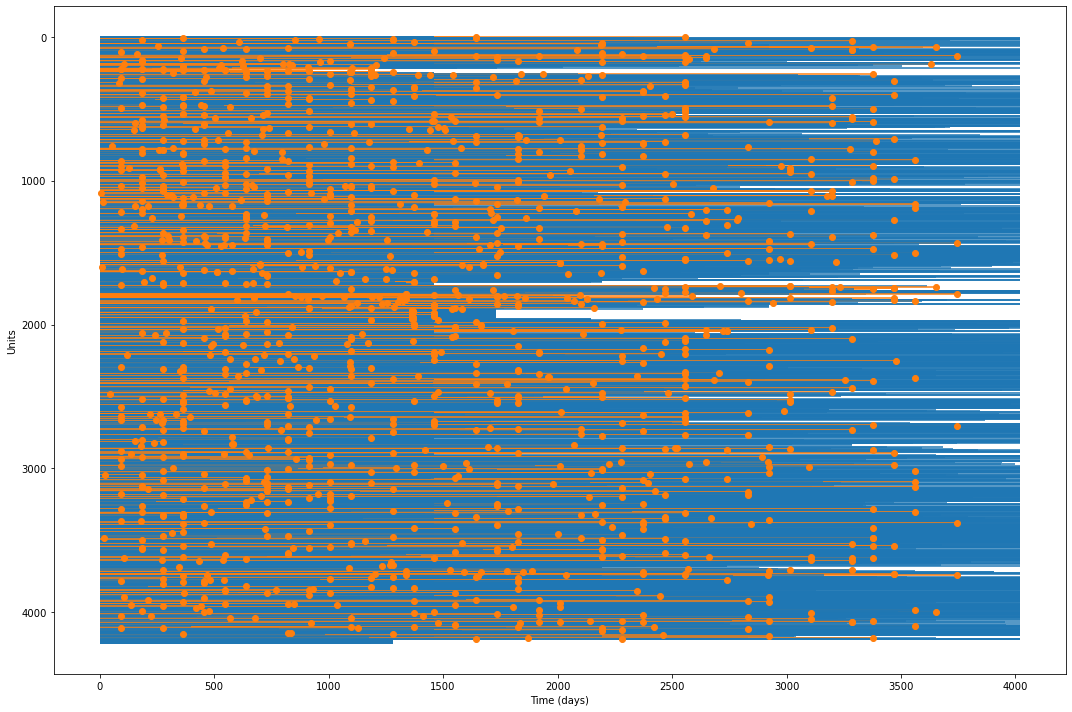

In [68]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
plot_lifelines(df)
fig.savefig('outputs_img/Camden-Highstreets-survival-lifelines.jpg')

          KM_estimate
timeline             
0.0          1.000000
6.0          0.999763
8.0          0.999526
14.0         0.999289
20.0         0.999051
...               ...
3982.0       0.583636
3988.0       0.583636
3991.0       0.583636
4000.0       0.583636
4018.0       0.583636

[1190 rows x 1 columns]


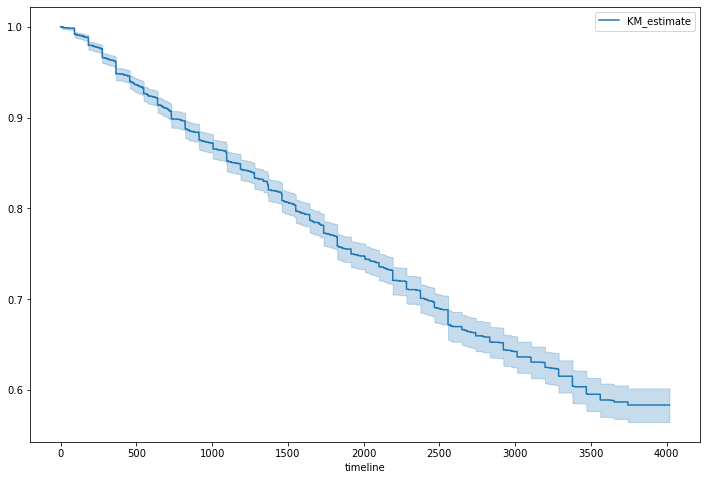

In [200]:
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed= df['vacant'])

print(kmf.survival_function_)

fig, ax = plt.subplots(1,1, figsize=(12,8))
ax = kmf.plot(ax=ax, ci_show=True)
fig.savefig('outputs_img/survival_analysis/Camden-Highstreets-Survival.jpg')

In [70]:
survival = kmf.survival_function_

In [71]:
survival.to_csv("survival table.csv")

In [201]:
print(kmf.median_survival_time_)

inf


In [72]:
df['highstreet'] = df['highstreet'].astype('category')

In [73]:
df['category'] = df['category'].astype('category')

In [74]:
df.loc[df['use_category'].isnull(), 'use_category'] = "Other"

In [75]:
df['use_category'] = df['use_category'].astype('category')

In [76]:
df.loc[df['sub_category'].isnull(), 'sub_category'] = "Other"

In [77]:
df['sub_category'] = df['sub_category'].astype('category')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Columns: 212 entries, Unnamed: 0 to cluster
dtypes: bool(4), category(4), float64(32), int64(128), object(44)
memory usage: 6.6+ MB


In [28]:
df['cluster'] = df['cluster'].astype('category')

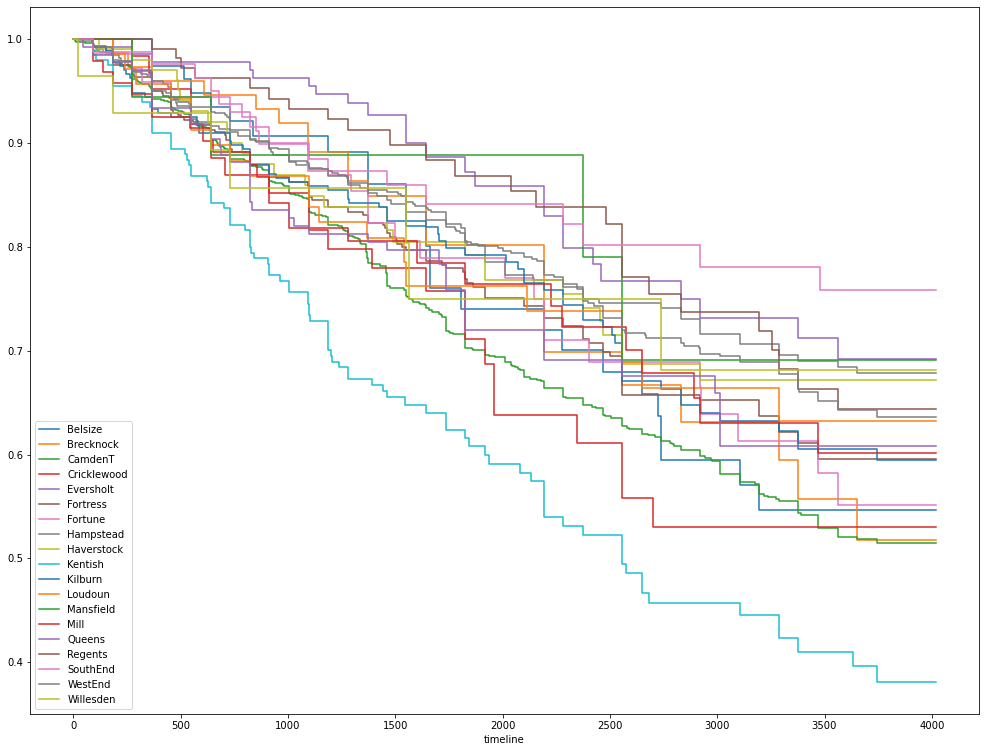

In [28]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('Camden-Highstreets-Survival.jpg')

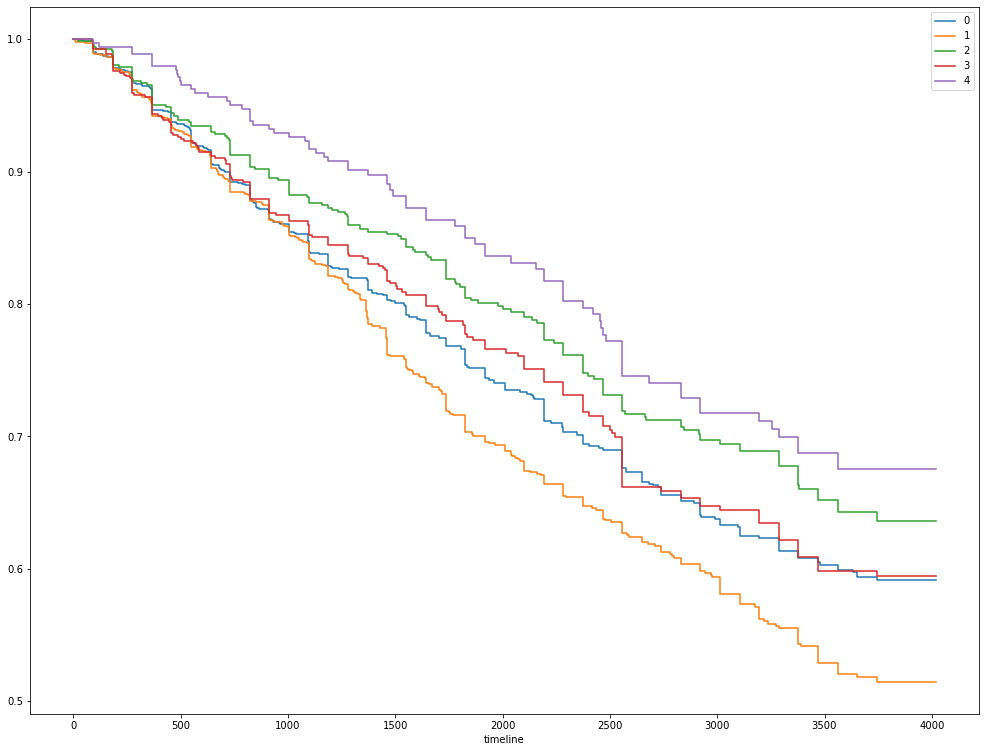

In [32]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for cluster, df_ in df[['cluster','vacant', 'survival']].groupby('cluster'):
    kmf.fit(df_['survival'], df_['vacant'], label=cluster)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('outputs_img/Camden-Highstreets-Cluster-Survival.jpg')

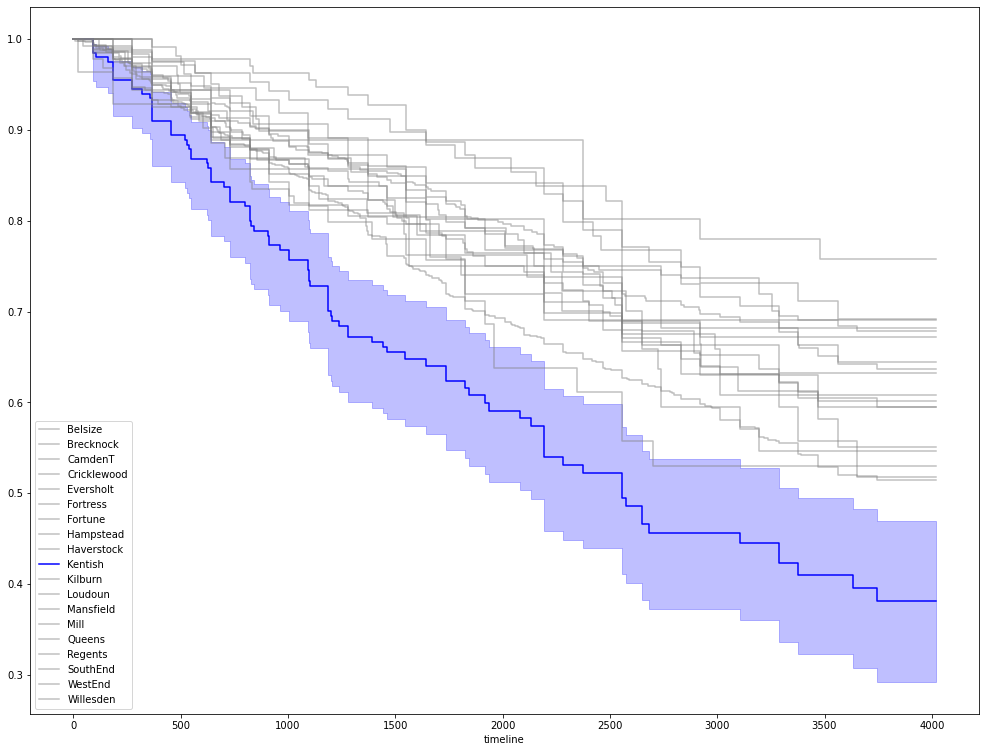

In [20]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'Kentish':
        ax = kmf.plot(ax=ax, color='b')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
fig.savefig('Kentish-Highlight-Highstreets-Survival.jpg')

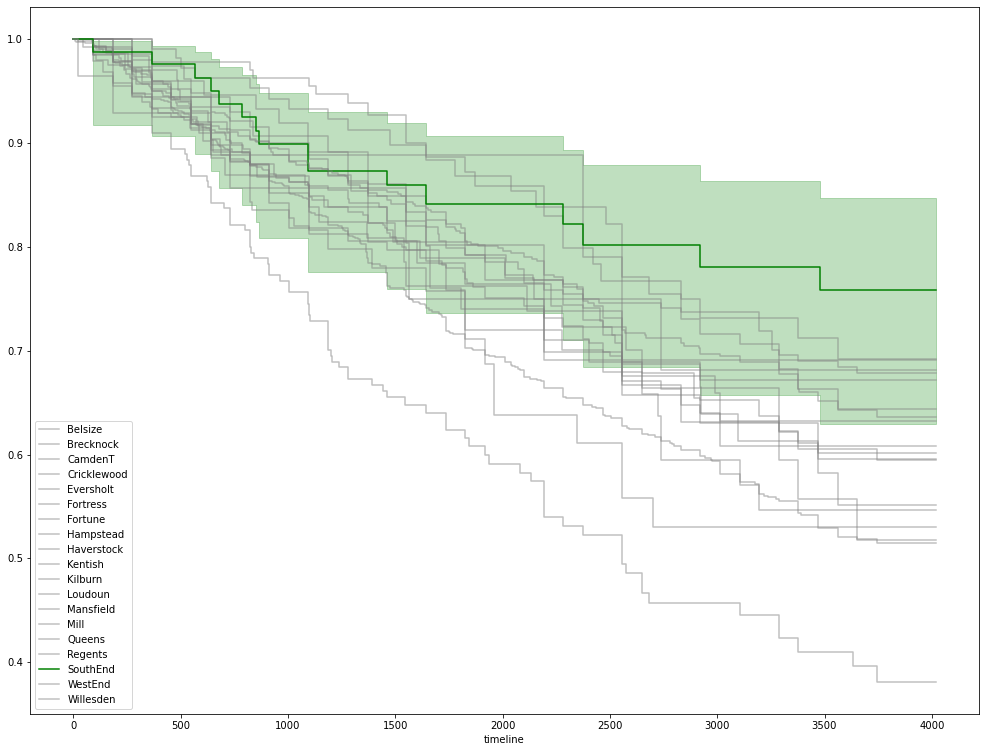

In [19]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'SouthEnd':
        ax = kmf.plot(ax=ax, color='green')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
fig.savefig('SouthEnd-Highlight-Highstreets-Survival.jpg')

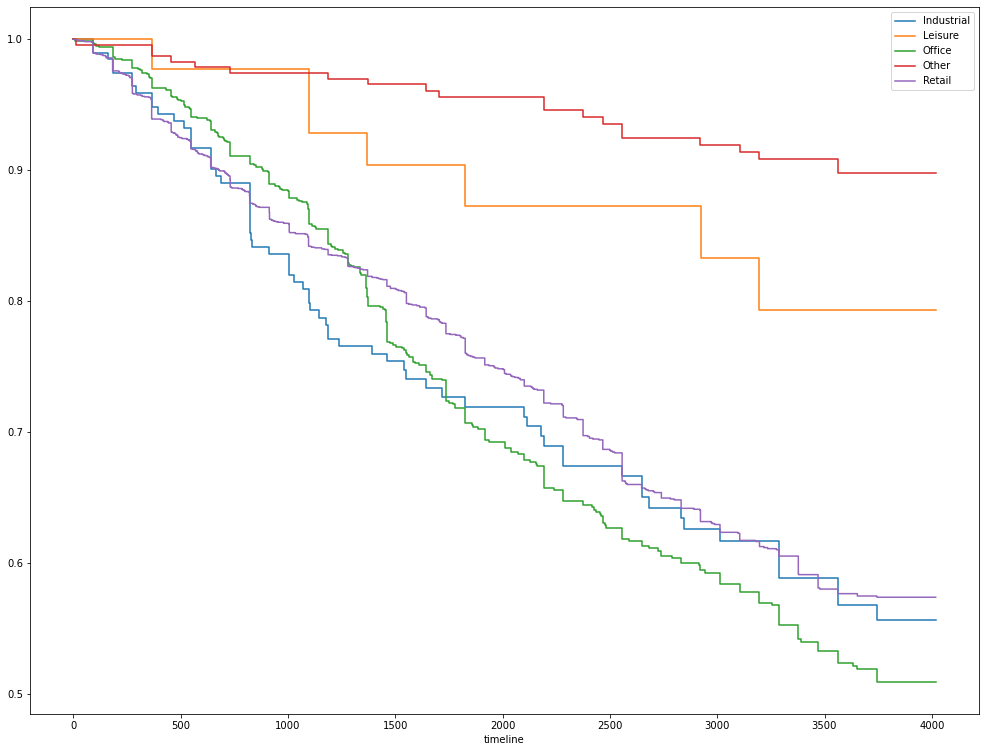

In [170]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(1,1, figsize=(17,13))
ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig("outputs_img/survival_analysis/'suvrival by category.jpg")

In [176]:
print(kmf.survival_function_)

            Retail
timeline          
0.0       1.000000
6.0       0.999634
20.0      0.999267
23.0      0.998901
44.0      0.998534
...            ...
3964.0    0.573672
3970.0    0.573672
3974.0    0.573672
3991.0    0.573672
4018.0    0.573672

[899 rows x 1 columns]


In [173]:
kmf_cats = kmf.survival_function_

In [ ]:
kmf_cats.to_csv("outputs_csv/camden-survival-by-category.csv")

In [178]:
print(kmf.median_)

AttributeError: 'KaplanMeierFitter' object has no attribute 'median_'

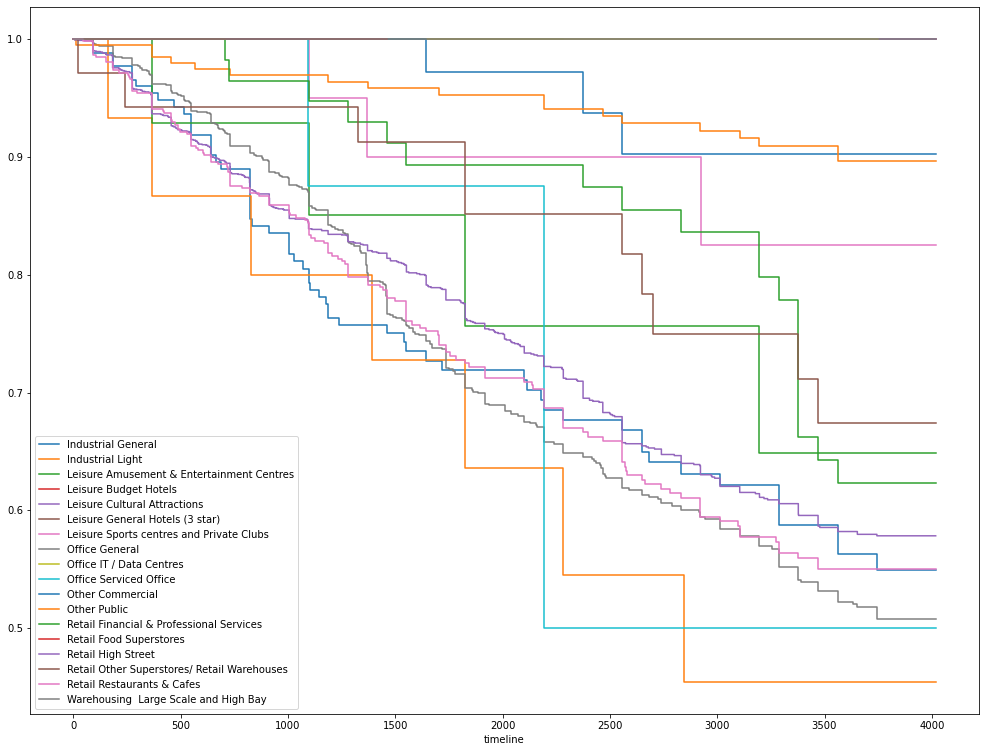

In [183]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(1,1, figsize=(17,13))
ax = plt.subplot()

for sub_category, df_ in df[['sub_category', 'vacant', 'survival']].groupby('sub_category'):
    kmf.fit(df_['survival'], df_['vacant'], label=sub_category)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig("outputs_img/survival_analysis/'suvival by subcategory.jpg")

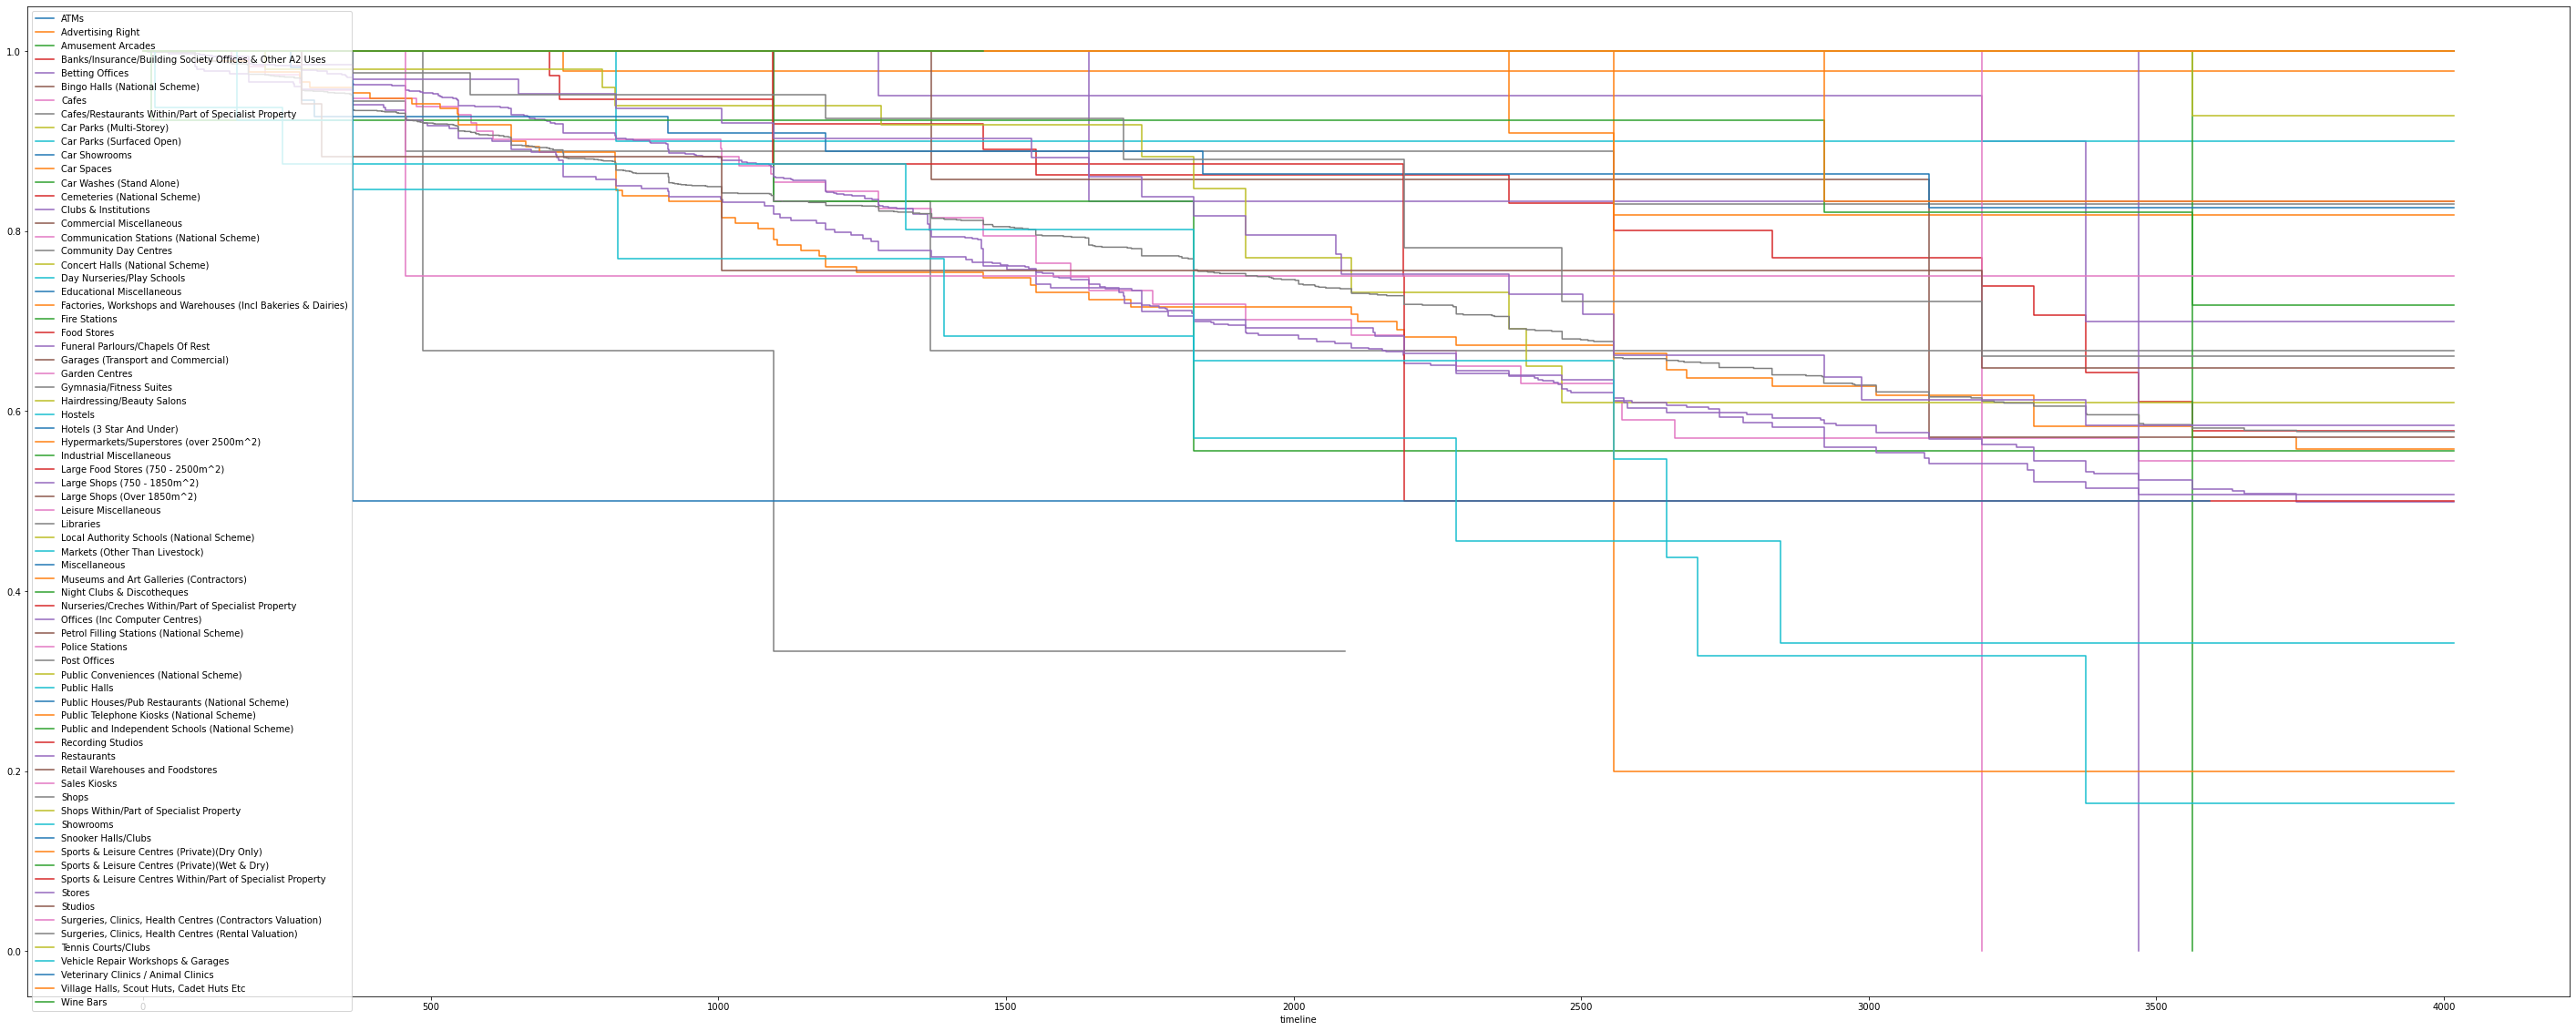

In [42]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(1,1, figsize=(50,20))
ax = plt.subplot()

for use_category, df_ in df[['use_category','vacant', 'survival']].groupby('use_category'):
    kmf.fit(df_['survival'], df_['vacant'], label=use_category)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig("outputs_img/survival_analysis/'suvival by use category.jpg")

In [14]:
kentish = pd.read_csv("Camden High Streets/Kentish-final-survival.csv")

          KM_estimate
timeline             
0.0          1.000000
91.0         0.985000
106.0        0.980000
163.0        0.975000
183.0        0.955000
...               ...
3506.0       0.409972
3632.0       0.395835
3741.0       0.395835
3744.0       0.381174
4018.0       0.381174

[109 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

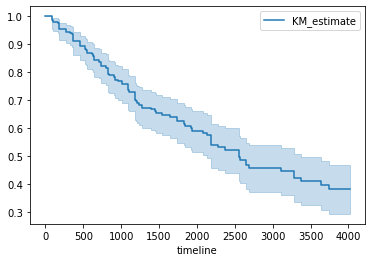

In [15]:
kmf = KaplanMeierFitter()
kmf.fit(kentish['survival'], event_observed= kentish['vacant'])

print(kmf.survival_function_)
#print(kmf.median_)
kmf.plot()

In [16]:
kentish.loc[kentish['category'].isnull(), 'category'] = "Other"

In [17]:
kentish['category'] = kentish['category'].astype('category')

In [28]:
kentish['sub_category'] = kentish['sub_category'].astype('category')

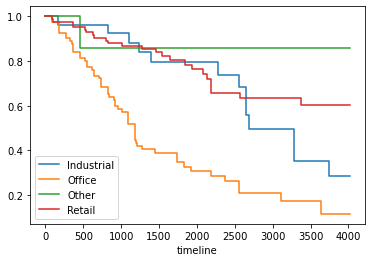

In [18]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    ax = kmf.plot(ax=ax, ci_show=False)

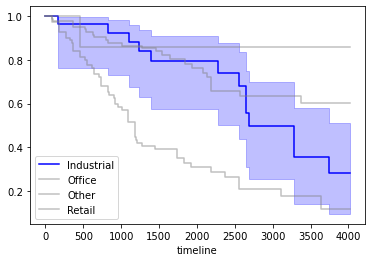

In [19]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Industrial':
        ax = kmf.plot(ax=ax, color='b')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

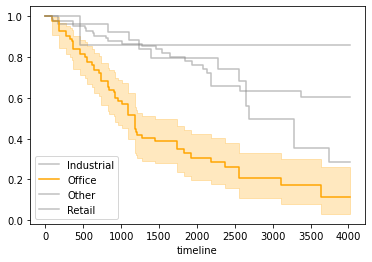

In [20]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Office':
        ax = kmf.plot(ax=ax, color='orange')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

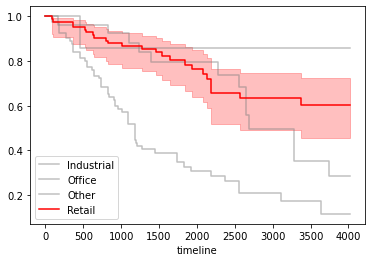

In [21]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Retail':
        ax = kmf.plot(ax=ax, color='r')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

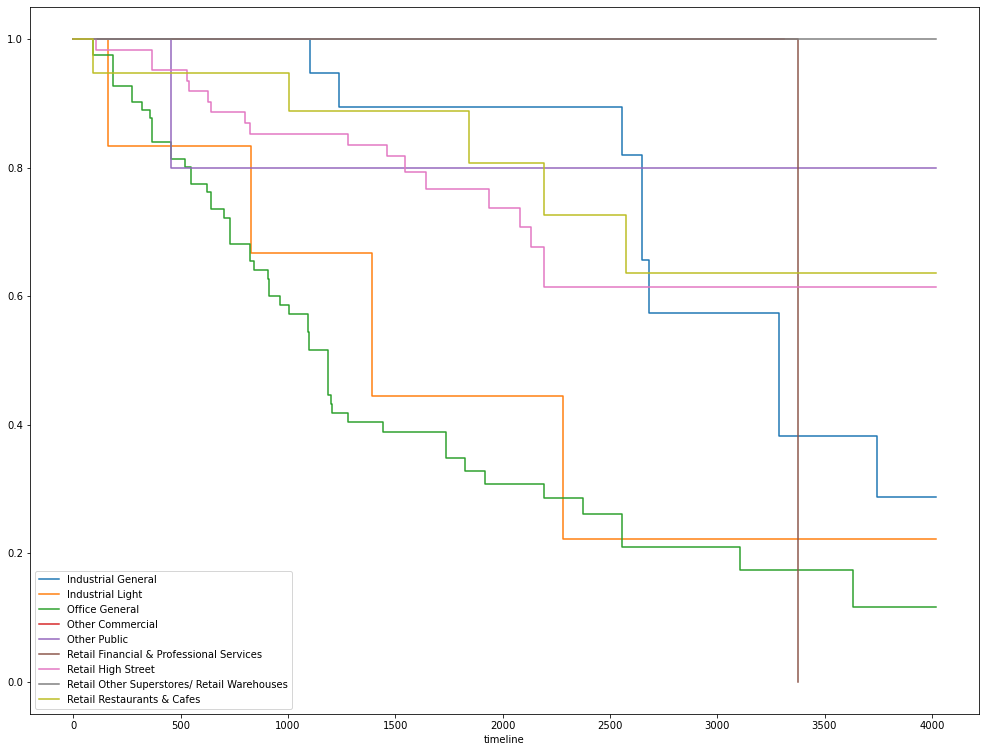

In [33]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for sub_category, df_ in kentish[['sub_category','vacant', 'survival']].groupby('sub_category'):
    kmf.fit(df_['survival'], df_['vacant'], label=sub_category)
    ax = kmf.plot(ax=ax, ci_show=False)

In [35]:
kmf

<lifelines.KaplanMeierFitter:"Retail Restaurants & Cafes", fitted with 19 total observations, 14 right-censored observations>

In [184]:
df_retail = df.loc[df['category'] == 'Retail']

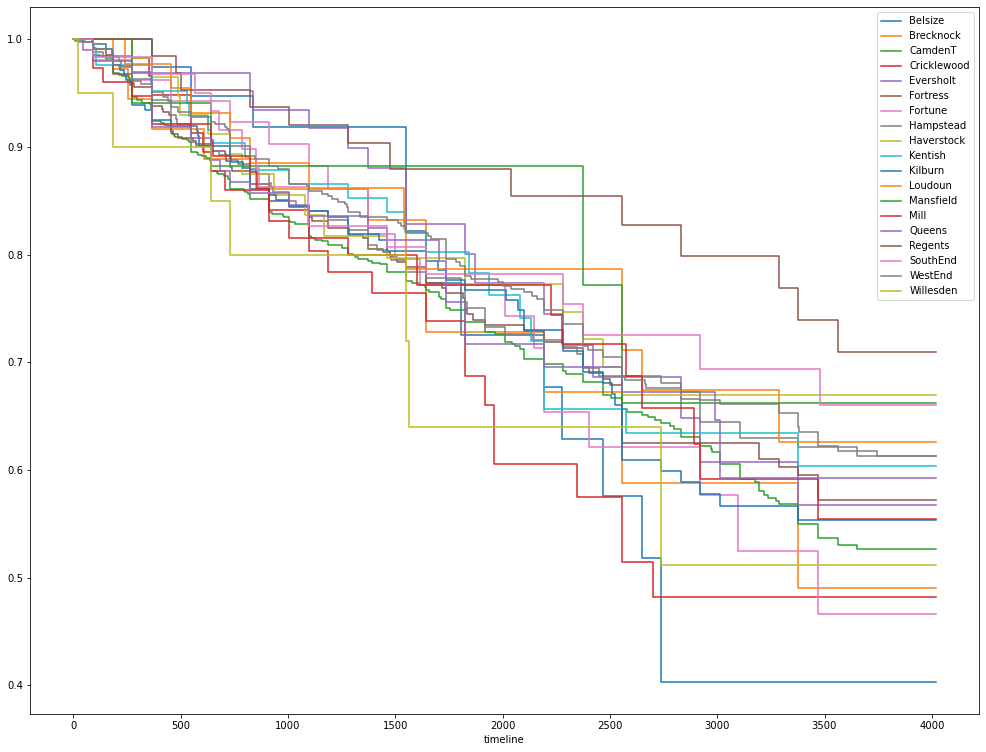

In [189]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig("outputs_img/survival_analysis/'Camden-Highstreets-Retail-Survival.jpg")

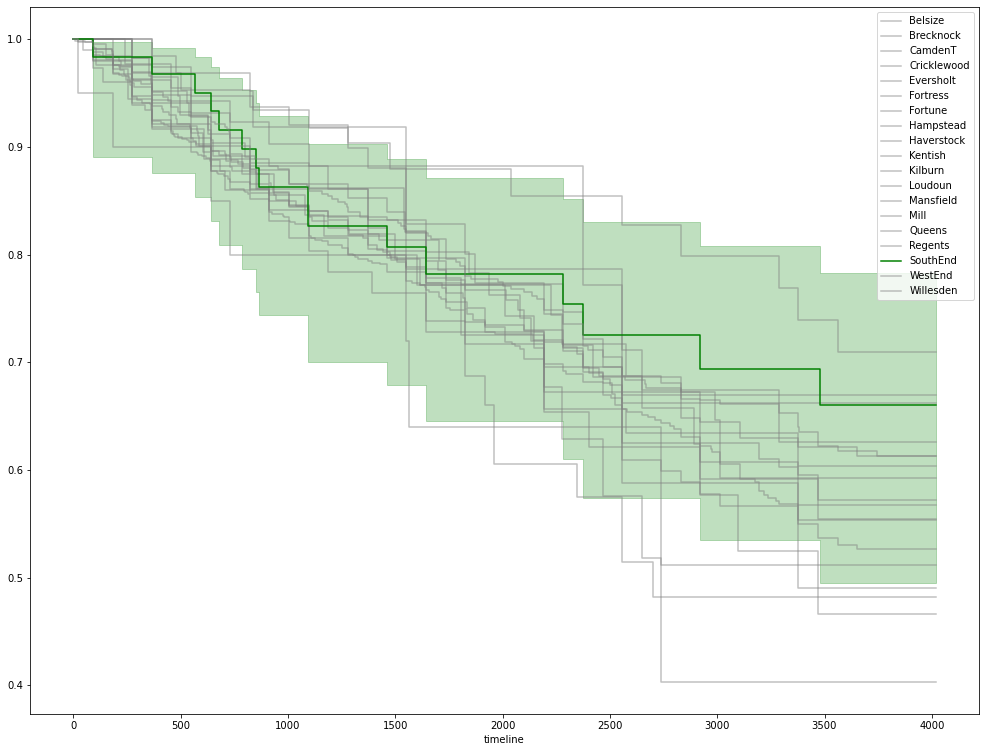

In [194]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'SouthEnd':
        ax = kmf.plot(ax=ax, color='green')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
    
fig.savefig('outputs_img/survival_analysis/southend-Retail-Survival.jpg')

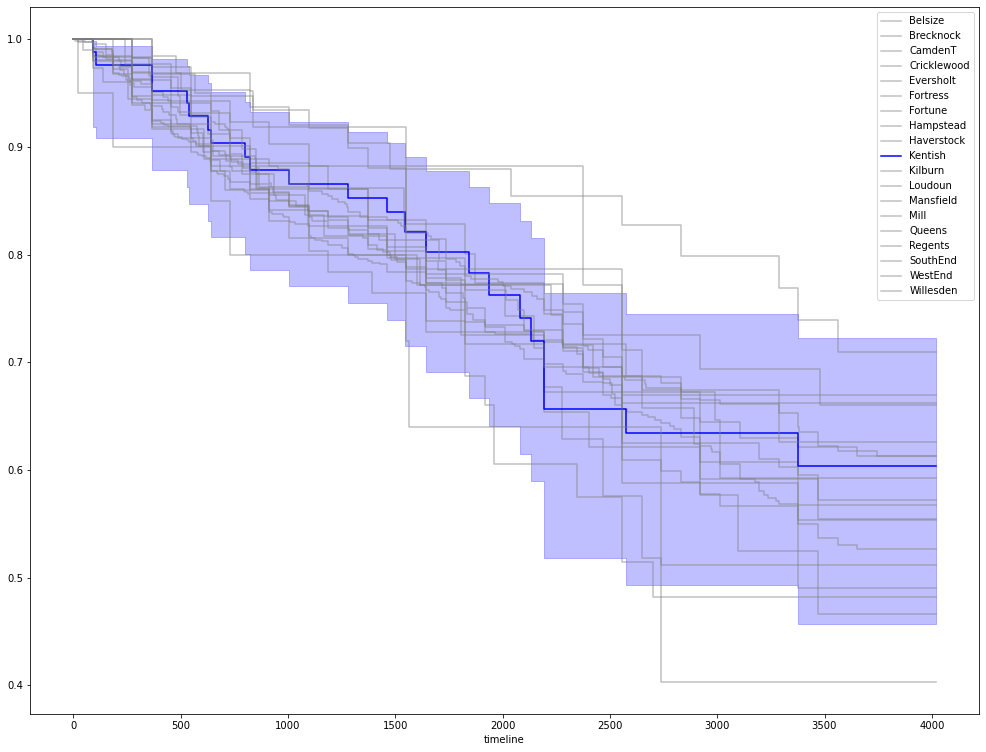

In [195]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'Kentish':
        ax = kmf.plot(ax=ax, color='blue')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
    
fig.savefig('outputs_img/survival_analysis/kentish-Retail-Survival.jpg')

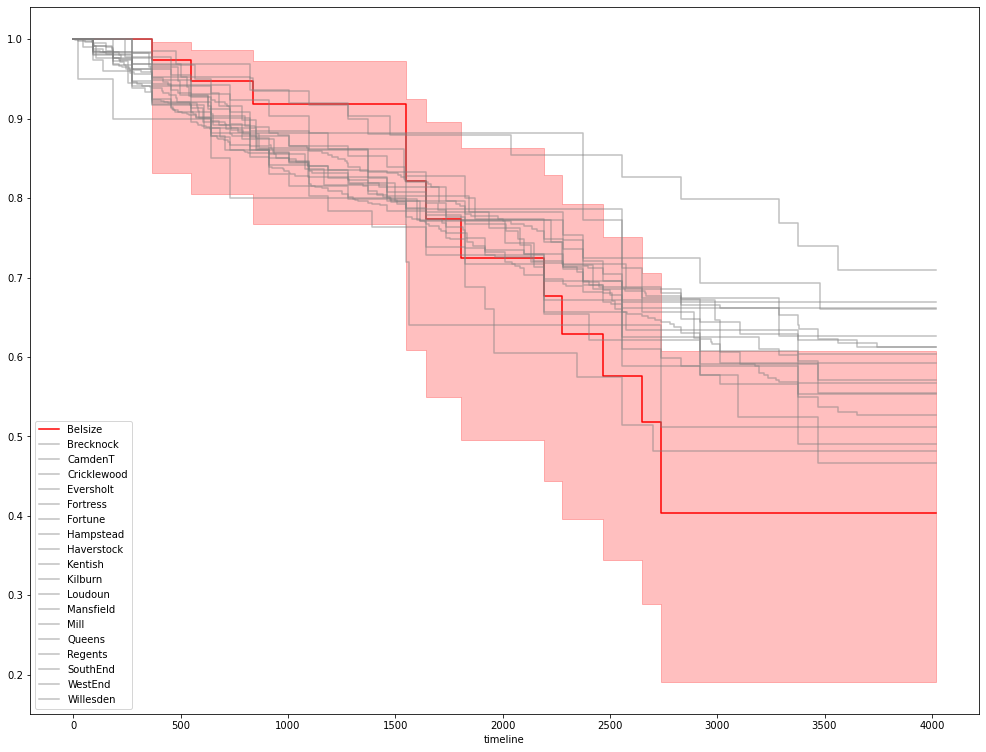

In [196]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'Belsize':
        ax = kmf.plot(ax=ax, color='red')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
    
fig.savefig('outputs_img/survival_analysis/belsize-Retail-Survival.jpg')

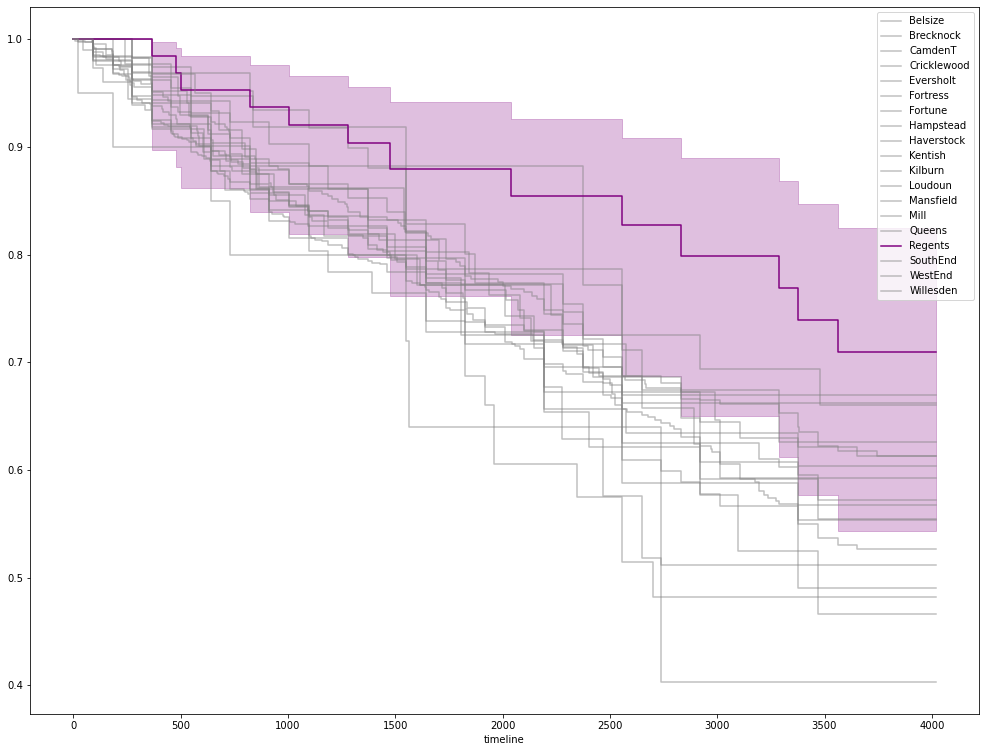

In [198]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'Regents':
        ax = kmf.plot(ax=ax, color='purple')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
    
fig.savefig('outputs_img/survival_analysis/regents-Retail-Survival.jpg')

In [24]:
df_office = df.loc[df['category'] == 'Office']

In [26]:
df_office

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
12,12,32295,32295,0023300451003B,E09000007,Camden,Inner London - West,GND F UNIT B AT 45,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,4018,0,4018,0,1,False,True,Brecknock
16,16,64764,64764,00387000130089,E09000007,Camden,Inner London - West,GND F BLK F 1-2 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,0 days,4018,0,4018,0,1,False,True,Brecknock
17,17,64808,64808,0038700013011B,E09000007,Camden,Inner London - West,GND F BLK B 5 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,0 days,4018,0,4018,0,1,False,True,Brecknock
18,18,64866,64866,0038700013020A,E09000007,Camden,Inner London - West,3RD F BLK B 14 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,0 days,1279,1,1279,0,1,False,True,Brecknock
19,19,64877,64877,0038700013020A,E09000007,Camden,Inner London - West,3RD F BLK B 14 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,1324 days,2283,1,959,1324,1,False,True,Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,00782002470001,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt
4213,4213,414838,414838,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4214,4214,414898,414898,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4215,4215,414853,414853,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt


In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_office[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('Camden-Highstreets-Office-Survival.jpg')

In [ ]:
df_other = df.loc[df['category'] == 'Other']

In [ ]:
df_other

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_other[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('Camden-Highstreets-Other-Survival.jpg')

In [79]:
print(list(df.columns.values))

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rates_code', 'rates_authority_id', 'rates_authority', 'region', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'sub_category', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'name', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published', 'V1', 'V2', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V18', 'V22', 'V23', 'V24', 'V25', 'V27', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50', 'V52', 'V53', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V68', 'V69', 'V71', 'V73', 'V74', 'V75', 'V76', 'geometry', 'new_date', 'locaton_code', 'period2', 'duration', 'study-start', 'time-of-entry', 'time-at-vacant', 'vacant', 'survival', 'entry', 'stat', 'StatusChange', 'TenantChange', 'highstreet', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amu

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Columns: 212 entries, Unnamed: 0 to cluster
dtypes: bool(4), category(4), float64(32), int64(128), object(44)
memory usage: 6.6+ MB


## ENVIRONMENTAL

In [160]:
df_environ = df.copy()

In [161]:
environment = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rates_code', 'rates_authority_id', 'rates_authority', 'region', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'sub_category', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'name', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published', 'V1', 'V2', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V18', 'V22', 'V23', 'V24', 'V25', 'V27', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50', 'V52', 'V53', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V68', 'V69', 'V71', 'V73', 'V74', 'V75', 'V76', 'geometry', 'new_date', 'locaton_code', 'period2', 'duration', 'study-start', 'time-of-entry', 'time-at-vacant', 'entry', 'stat', 'StatusChange', 'TenantChange', 'highstreet', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Over 1850m^2)', 'Libraries', 'Local Authority Schools (National Scheme)', 'Markets (Other Than Livestock)', 'Miscellaneous', 'Museums and Art Galleries (Contractors)', 'Night Clubs & Discotheques', 'Nurseries/Creches Within/Part of Specialist Property', 'Offices (Inc Computer Centres)', 'Petrol Filling Stations (National Scheme)', 'Police Stations', 'Post Offices', 'Public Conveniences (National Scheme)', 'Public Halls', 'Public Houses/Pub Restaurants (National Scheme)', 'Public Telephone Kiosks (National Scheme)', 'Public and Independent Schools (National Scheme)', 'Recording Studios', 'Restaurants', 'Retail Warehouses and Foodstores', 'Sales Kiosks', 'Shops', 'Shops Within/Part of Specialist Property', 'Showrooms', 'Sports & Leisure Centres (Private)(Dry Only)', 'Sports & Leisure Centres (Private)(Wet & Dry)', 'Sports & Leisure Centres Within/Part of Specialist Property', 'Stores', 'Studios', 'Surgeries, Clinics, Health Centres (Contractors Valuation)', 'Surgeries, Clinics, Health Centres (Rental Valuation)', 'Tennis Courts/Clubs', 'Vehicle Repair Workshops & Garages', 'Veterinary Clinics / Animal Clinics', 'Village Halls, Scout Huts, Cadet Huts Etc', 'Wine Bars', 'bench', 'bicycle_rental', 'camera_surveillance', 'fountain', 'post_box', 'recycling', 'recycling_clothes', 'recycling_glass', 'recycling_paper', 'telephone', 'tourist_info', 'vending_parking', 'waste_basket', 'public toilets', 'bus_stops', 'train', 'median_95Q4', 'median_18Q4', '95-18_price_diff', 'count_95Q4', 'count_18Q4', '95-18_tansc_diff', 'household_estimate_01_02', 'household_estimate_12_13', 'household_estimate_diff', 'All usual residents', 'Density (number of persons per hectare)', 'Economically_active_total', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average download speed (Mbit/s)', 'Average data usage (GB)', 'AvPTAI2015', '2018_road_causaulties', 'averaege_yearly_causaulties(2010-2018)', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'total_rates_paid', 'mean_rates_paid', 'total_rates_expected', 'mean_rates_expected', 'cluster']

In [162]:
df_environ.drop(columns = environment, inplace=True)

In [163]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_environ, 'survival', event_col='vacant')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 4217 total observations, 2894 right-censored observations>
             duration col = 'survival'
                event col = 'vacant'
      baseline estimation = breslow
   number of observations = 4217
number of events observed = 1323
   partial log-likelihood = -10427.27
         time fit was run = 2021-09-15 23:45:13 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
trees             0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
noise_pollution   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NOxTotal10       -0.09       0.91       0.08            -0.24             0.06                 0.79                 1.06
PM10Tot10         0.51       1.66       0.72            -0.90             1.91                 0.41                 6.75

                    z    p   -log2(p)
covariate                            
trees            2.35 0.02       5.73
noise_pollution  1.18 0.24       2.08
NOxTotal10      -1.20 0.23       2.11
PM10Tot10        0.71 0.48       1.06
---
Concordance = 0.54
Partial AIC = 20862.53
log-likelihood ratio test = 27.17 on 4 df
-log2(p) of ll-ratio test = 15.73

<AxesSubplot:xlabel='log(HR) (95% CI)'>

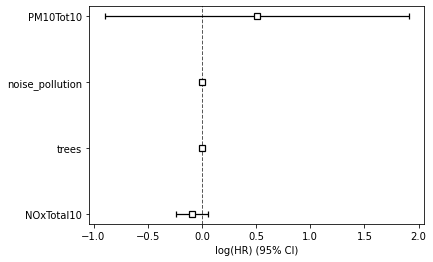

In [108]:
cph.plot()

In [116]:
cph.print_summary(model = 'base model', decimals = 3, columns = ['coef', 'exp(coef)', 'p'])

<lifelines.CoxPHFitter: fitted with 4217 total observations, 2894 right-censored observations>
             duration col = 'survival'
                event col = 'vacant'
      baseline estimation = breslow
   number of observations = 4217
number of events observed = 1323
   partial log-likelihood = -10427.266
         time fit was run = 2021-09-15 22:05:03 UTC
                    model = base model

---
                  coef  exp(coef)     p
covariate                              
trees            0.000      1.000 0.019
noise_pollution  0.002      1.002 0.237
NOxTotal10      -0.091      0.913 0.232
PM10Tot10        0.506      1.658 0.480
---
Concordance = 0.540
Partial AIC = 20862.531
log-likelihood ratio test = 27.172 on 4 df
-log2(p) of ll-ratio test = 15.734

In [115]:
# Check model assumptions, with a threshold of 0.001 (i.e. only highlight extreme significances - rationale explained after the results)
cph.check_assumptions(df_environ, p_value_threshold=0.001, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [118]:
test_id = df_environ.sample(1)

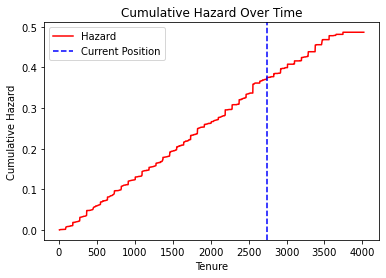

In [122]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.survival.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

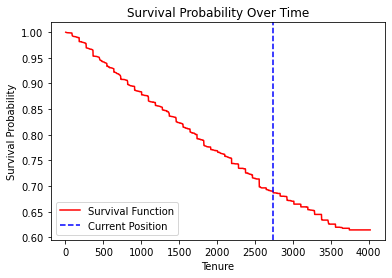

In [124]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.survival.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

## TRANSPORT

In [164]:
transport = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rates_code', 'rates_authority_id', 'rates_authority', 'region', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'sub_category', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'name', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published', 'V1', 'V2', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V18', 'V22', 'V23', 'V24', 'V25', 'V27', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50', 'V52', 'V53', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V68', 'V69', 'V71', 'V73', 'V74', 'V75', 'V76', 'geometry', 'new_date', 'locaton_code', 'period2', 'duration', 'study-start', 'time-of-entry', 'time-at-vacant', 'entry', 'stat', 'StatusChange', 'TenantChange', 'highstreet', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Showrooms', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Over 1850m^2)', 'Libraries', 'Local Authority Schools (National Scheme)', 'Markets (Other Than Livestock)', 'Miscellaneous', 'Museums and Art Galleries (Contractors)', 'Night Clubs & Discotheques', 'Nurseries/Creches Within/Part of Specialist Property', 'Offices (Inc Computer Centres)', 'Petrol Filling Stations (National Scheme)', 'Police Stations', 'Post Offices', 'Public Conveniences (National Scheme)', 'Public Halls', 'Public Houses/Pub Restaurants (National Scheme)', 'Public Telephone Kiosks (National Scheme)', 'Public and Independent Schools (National Scheme)', 'Recording Studios', 'Restaurants', 'Retail Warehouses and Foodstores', 'Sales Kiosks', 'Shops', 'Shops Within/Part of Specialist Property', 'Showrooms', 'Sports & Leisure Centres (Private)(Dry Only)', 'Sports & Leisure Centres (Private)(Wet & Dry)', 'Sports & Leisure Centres Within/Part of Specialist Property', 'Stores', 'Studios', 'Surgeries, Clinics, Health Centres (Contractors Valuation)', 'Surgeries, Clinics, Health Centres (Rental Valuation)', 'Tennis Courts/Clubs', 'Vehicle Repair Workshops & Garages', 'Veterinary Clinics / Animal Clinics', 'Village Halls, Scout Huts, Cadet Huts Etc', 'Wine Bars', 'bench', 'bicycle_rental', 'camera_surveillance', 'fountain', 'post_box', 'recycling', 'recycling_clothes', 'recycling_glass', 'recycling_paper', 'telephone', 'tourist_info', 'vending_parking', 'waste_basket', 'public toilets', 'trees', 'median_95Q4', 'median_18Q4', '95-18_price_diff', 'count_95Q4', 'count_18Q4', '95-18_tansc_diff', 'household_estimate_01_02', 'household_estimate_12_13', 'household_estimate_diff', 'All usual residents', 'Density (number of persons per hectare)', 'Economically_active_total', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average download speed (Mbit/s)', 'Average data usage (GB)', 'AvPTAI2015', 'averaege_yearly_causaulties(2010-2018)', 'noise_pollution', 'NOxTotal10', 'PM10Tot10', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'total_rates_paid', 'mean_rates_paid', 'total_rates_expected', 'mean_rates_expected', 'cluster']

In [165]:
transport_df = df.copy()

In [166]:
transport_df.drop(columns = transport, inplace=True)

In [167]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(transport_df, 'survival', event_col='vacant')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 4217 total observations, 2894 right-censored observations>
             duration col = 'survival'
                event col = 'vacant'
      baseline estimation = breslow
   number of observations = 4217
number of events observed = 1323
   partial log-likelihood = -10415.06
         time fit was run = 2021-09-15 23:45:50 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
Car Parks (Multi-Storey)    0.08       1.08       0.24            -0.39             0.54                 0.68                 1.72
Car Parks (Surfaced Open)   0.32       1.38       0.32            -0.31             0.95                 0.73                 2.58
Car Spaces                  0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
bus_stops                  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
train                      -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
2018_road_causaulties       0.01       1.01       0.00             0.00             0.01                 1.00                 1.01

                              z      p   -log2(p)
covariate                                        
Car Parks (Multi-Storey)   0.33   0.74       0.44
Car Parks (Surfaced Open)  0.99   0.32       1.64
Car Spaces                 0.01   0.99       0.02
bus_stops                 -0.75   0.45       1.15
train                     -0.20   0.84       0.25
2018_road_causaulties      3.44 <0.005      10.76
---
Concordance = 0.55
Partial AIC = 20842.12
log-likelihood ratio test = 51.58 on 6 df
-log2(p) of ll-ratio test = 28.72

<AxesSubplot:xlabel='log(HR) (95% CI)'>

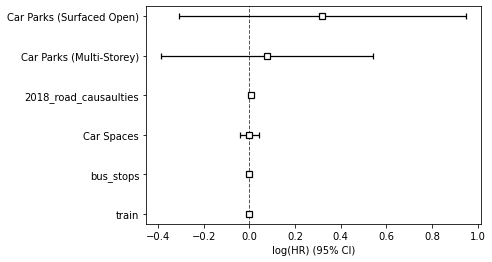

In [168]:
cph.plot()

## ECONOMIC

In [133]:
econ = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rates_code', 'rates_authority_id', 'rates_authority', 'region', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'sub_category', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'name', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published', 'V1', 'V2', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V18', 'V22', 'V23', 'V24', 'V25', 'V27', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50', 'V52', 'V53', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V68', 'V69', 'V71', 'V73', 'V74', 'V75', 'V76', 'geometry', 'new_date', 'locaton_code', 'period2', 'duration', 'study-start', 'time-of-entry', 'time-at-vacant', 'entry', 'stat', 'StatusChange', 'TenantChange', 'highstreet', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Over 1850m^2)', 'Libraries', 'Local Authority Schools (National Scheme)', 'Markets (Other Than Livestock)', 'Miscellaneous', 'Museums and Art Galleries (Contractors)', 'Night Clubs & Discotheques', 'Nurseries/Creches Within/Part of Specialist Property', 'Offices (Inc Computer Centres)', 'Petrol Filling Stations (National Scheme)', 'Police Stations', 'Post Offices', 'Public Conveniences (National Scheme)', 'Public Halls', 'Public Houses/Pub Restaurants (National Scheme)', 'Public Telephone Kiosks (National Scheme)', 'Public and Independent Schools (National Scheme)', 'Recording Studios', 'Restaurants', 'Retail Warehouses and Foodstores', 'Sales Kiosks', 'Shops', 'Shops Within/Part of Specialist Property', 'Showrooms', 'Sports & Leisure Centres (Private)(Dry Only)', 'Sports & Leisure Centres (Private)(Wet & Dry)', 'Sports & Leisure Centres Within/Part of Specialist Property', 'Stores', 'Studios', 'Surgeries, Clinics, Health Centres (Contractors Valuation)', 'Surgeries, Clinics, Health Centres (Rental Valuation)', 'Tennis Courts/Clubs', 'Vehicle Repair Workshops & Garages', 'Veterinary Clinics / Animal Clinics', 'Village Halls, Scout Huts, Cadet Huts Etc', 'Wine Bars', 'bench', 'bicycle_rental', 'camera_surveillance', 'fountain', 'post_box', 'recycling', 'recycling_clothes', 'recycling_glass', 'recycling_paper', 'telephone', 'tourist_info', 'vending_parking', 'waste_basket', 'public toilets', 'trees', 'bus_stops', 'train', 'median_95Q4', '95-18_price_diff', 'count_95Q4', '95-18_tansc_diff', 'household_estimate_01_02', 'household_estimate_diff', 'All usual residents', 'Density (number of persons per hectare)', 'Economically_active_total', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average download speed (Mbit/s)', 'Average data usage (GB)', 'AvPTAI2015', '2018_road_causaulties', 'averaege_yearly_causaulties(2010-2018)', 'noise_pollution', 'NOxTotal10', 'PM10Tot10', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'total_rates_paid',  'total_rates_expected', 'cluster']

In [134]:
econ_df = df.copy()

In [135]:
econ_df.drop(columns=econ, inplace=True)

In [136]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(econ_df, 'survival', event_col='vacant')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 4217 total observations, 2894 right-censored observations>
             duration col = 'survival'
                event col = 'vacant'
      baseline estimation = breslow
   number of observations = 4217
number of events observed = 1323
   partial log-likelihood = -10435.44
         time fit was run = 2021-09-15 22:36:36 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
median_18Q4               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
count_18Q4                 0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
household_estimate_12_13   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
mean_rental_valuation     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
mean_rates_paid           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
mean_rates_expected        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                             z    p   -log2(p)
covariate                                     
median_18Q4              -0.33 0.74       0.43
count_18Q4                0.49 0.63       0.67
household_estimate_12_13  0.19 0.85       0.23
mean_rental_valuation    -0.17 0.87       0.21
mean_rates_paid          -0.03 0.97       0.04
mean_rates_expected       0.17 0.86       0.21
---
Concordance = 0.55
Partial AIC = 20882.88
log-likelihood ratio test = 10.83 on 6 df
-log2(p) of ll-ratio test = 3.41

In [142]:
cph.plot()

AttributeError: Must call `fit` first.

## land use 

In [137]:
cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rates_code', 'rates_authority_id', 'rates_authority', 'region', 'address_no', 'address_street', 'address_town', 'pc__pcs', 'use_category', 'scat_code', 'category', 'floor_area', 'rental_valuation', 'valuation_date', 'revaluation_year', 'period', 'rates_expected', 'name', 'rates_paid', 'status', 'status_date', 'status_duration', 'ratepayers_published', 'V1', 'V2', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V18', 'V22', 'V23', 'V24', 'V25', 'V27', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50', 'V52', 'V53', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V68', 'V69', 'V71', 'V73', 'V74', 'V75', 'V76', 'geometry', 'new_date', 'locaton_code', 'period2', 'duration', 'study-start', 'time-of-entry', 'time-at-vacant', 'entry', 'stat', 'StatusChange', 'TenantChange', 'highstreet', 'area_ha', 'road_length', 'ATMs', 'Advertising Right', 'Amusement Arcades', 'Banks/Insurance/Building Society Offices & Other A2 Uses', 'Betting Offices', 'Bingo Halls (National Scheme)', 'Cafes', 'Cafes/Restaurants Within/Part of Specialist Property', 'Car Parks (Multi-Storey)', 'Car Parks (Surfaced Open)', 'Car Showrooms', 'Car Spaces', 'Car Washes (Stand Alone)', 'Cemeteries (National Scheme)', 'Clubs & Institutions', 'Commercial Miscellaneous', 'Communication Stations (National Scheme)', 'Community Day Centres', 'Concert Halls (National Scheme)', 'Day Nurseries/Play Schools', 'Educational Miscellaneous', 'Factories, Workshops and Warehouses (Incl Bakeries & Dairies)', 'Fire Stations', 'Food Stores', 'Funeral Parlours/Chapels Of Rest', 'Garages (Transport and Commercial)', 'Garden Centres', 'Gymnasia/Fitness Suites', 'Hairdressing/Beauty Salons', 'Hostels', 'Hotels (3 Star And Under)', 'Hypermarkets/Superstores (over 2500m^2)', 'Large Food Stores (750 - 2500m^2)', 'Large Shops (Over 1850m^2)', 'Libraries', 'Local Authority Schools (National Scheme)', 'Markets (Other Than Livestock)', 'Miscellaneous', 'Museums and Art Galleries (Contractors)', 'Night Clubs & Discotheques', 'Nurseries/Creches Within/Part of Specialist Property', 'Offices (Inc Computer Centres)', 'Petrol Filling Stations (National Scheme)', 'Police Stations', 'Post Offices', 'Public Conveniences (National Scheme)', 'Public Halls', 'Public Houses/Pub Restaurants (National Scheme)', 'Public Telephone Kiosks (National Scheme)', 'Public and Independent Schools (National Scheme)', 'Recording Studios', 'Restaurants', 'Retail Warehouses and Foodstores', 'Sales Kiosks', 'Shops', 'Shops Within/Part of Specialist Property', 'Showrooms', 'Sports & Leisure Centres (Private)(Dry Only)', 'Sports & Leisure Centres (Private)(Wet & Dry)', 'Sports & Leisure Centres Within/Part of Specialist Property', 'Stores', 'Studios', 'Surgeries, Clinics, Health Centres (Contractors Valuation)', 'Surgeries, Clinics, Health Centres (Rental Valuation)', 'Tennis Courts/Clubs', 'Vehicle Repair Workshops & Garages', 'Veterinary Clinics / Animal Clinics', 'Village Halls, Scout Huts, Cadet Huts Etc', 'Wine Bars', 'bench', 'bicycle_rental', 'camera_surveillance', 'fountain', 'post_box', 'recycling', 'recycling_clothes', 'recycling_glass', 'recycling_paper', 'telephone', 'tourist_info', 'vending_parking', 'waste_basket', 'public toilets', 'trees', 'bus_stops', 'train', 'median_95Q4', 'median_18Q4', '95-18_price_diff', 'count_95Q4', 'count_18Q4', '95-18_tansc_diff', 'household_estimate_01_02', 'household_estimate_12_13', 'household_estimate_diff', 'All usual residents', 'Density (number of persons per hectare)', 'Economically_active_total', 'Economically_inactive_total', 'Over_65s', 'crime', 'cultural_infra', 'GRP_CD', 'Average download speed (Mbit/s)', 'Average data usage (GB)', 'AvPTAI2015', '2018_road_causaulties', 'averaege_yearly_causaulties(2010-2018)', 'noise_pollution', 'NOxTotal10', 'PM10Tot10', 'total_buildings', 'total_floor_area', 'mean_floor_area', 'total_rental_valuation', 'mean_rental_valuation', 'total_rates_paid', 'mean_rates_paid', 'total_rates_expected', 'mean_rates_expected', 'cluster']

In [138]:
df_category = df.copy()

In [139]:
df_category.drop(columns = cols, inplace=True)

In [140]:
df_category['sub_category'] = df_category['sub_category'].astype('category')

In [141]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_category, 'survival', event_col='vacant')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

ValueError: could not convert string to float: 'Retail High Street'